# Lab 09 - Radiation Shielding (Part 1)

Edit this cell and provide the information requested:

- Your name:
- Your student number:
- Partner's name:

In [20]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Familiarize Part I (Equipment)

- Experimental goal: Figure out the attenuation coefficient $\mu$ for low-energy gamma rays attenuated by paper shielding.
- We used radioactive source #9, with the device set to "Geiger counter" at 450V. The source is located 1cm from the detector.
- Paper sheets come in thicknesses of 0.1mm each, according to a measurement using the calipers. 
- The timer has significant digits up to a hundreth of a second. This has instrumental uncertainty of $0.01/(2\sqrt{3}) = 0.002$ seconds. However, there is a larger form of uncertainty that comes from human error, namely the ability to stop the radiation counter and timer at the same time. We do a short experiment to measure this directly. We do 10 trials where we try to stop the timer precisely at 10 seconds. We then take the average of these trials, and find the deviation from the target time of 10 seconds; this gives us the first term in the human error, which we call $\Delta t_{\text{ave}} = 10 - t_{\text{ave}}$. We also take the standard deviation of these trials, which is a measure of our consistency; this gives us the second term in the human error, which we call $\sigma_t$. The uncertainty in the time is then given by:

$$u[t] = \sqrt{(\Delta t_{\text{ave}})^2 + \sigma_t^2}$$

## Familiarize Part II (Variables Under our Control)

- Candidate model for the count-rate is $R(x) = R_0\exp(-\mu x)$ where $x$ is the thickness of the paper shielding, $R_0$ is the zero-shielding count-rate, and $\mu$ is the attenuation coefficient. Note that when considering the semi-log plot and fitting a linear model, this becomes:
$$\log(R(x)) = \log(R_0\exp(-\mu x)) = \log(R_0) + \log(\exp(-\mu x)) = \log(R_0) - \mu x = b+ mx$$
    which gives a correspondence between fit parameters and physical parameters.
- $\mu$ can be extracted by measuring count rate (by measuring time intervals and number of radiation counts) at various thicknesses of shielding; by linearizing the data and fitting a linear model (with intercept) the attenuation coefficient can be extracted as the slope.

## Familiarize Part III (Uncertainties)

- Uncertainty in counts is given by statistics of Poisson distribution (which describes radiation counts); in particular:
$$u[N] = \sqrt{N}.$$
- For papers, there is some deviation when measuring multiple times due to the degree of compression of the paper; there is around a ~0.04mm range in which measurements can fall. As the uncertainty here is due to human error (multiple measuerements), we take a 95% CI of width 0.04cm and so an uncertainty of $u[x] = 0.01$mm per sheet of paper used.
- The timer has instrumental uncertainty of $0.01/(2\sqrt{3}) = 0.002$ seconds. However, there is a larger form of uncertainty that comes from human error, namely the ability to stop the radiation counter and timer at the same time. We do a short experiment to measure this directly. We do 10 trials where we use our stopwatch and the apparatus set to "Time in seconds" mode (timing mode). We measure $t_1$ and $t_2$, where $t_1$ corresponds to the stopping time of the stopwatch and $t_2$ corresponds to the stopping time of the apparatus, while we try to stop the two simultaneously. We then take their difference $\Delta t = t_2 - t_1$. From there, we calculate two terms of the error; the first is the average of the $\Delta t$s, $\Delta t_{\text{ave}}$ (which quantifies how far the two disagree on average). The second is the standard deviation of the $\Delta t$s, $\sigma_t$ (which quantifies how consistent the disagreement between the two timings are). We can then add the two in quadrature to get the uncertainty in time:
$$u[t] = \sqrt{(\Delta t_{\text{ave}})^2 + \sigma_t^2}.$$
- Uncertainty in count rate is given by:
$$u[R] = R\sqrt{\frac{1}{N} + \left(\frac{u[t]}{t}\right)^2}.$$

Below are the measurements and calculations for quantifying $u[t]$, as described above. We did 10 trials of trying to stop the two simultaneously.

In [5]:
de = data_entry.sheet("lab09_data_times.csv")

Sheet name: lab09_data_times.csv


In [9]:
deltatVec = t1Vec - t2Vec
deltatavg = np.mean(deltatVec)
deltatstd = np.std(deltatVec)
ut = np.sqrt(deltatavg**2 + deltatstd**2)
print(ut)

0.05932958789676519


We can see that the timing uncertainty arising from human error is much larger than the instrumental uncertainty; we can therefore neglect the latter.

## Familiarize Part IV (Practice Measurements + Measurement Strategy)

- We took practice measurements at 0 sheets, 1 sheet, 2 sheets, 4 sheets, and 8 sheets, all for 20 seconds each
- We found that the counts dropped more quickly than linearly as we added more sheets; certainly we have reason to believe that the behaviour is nonlinear, possibly exponential.
- Measurement strategy: Cover an even wider range of measurements (go up to using as much shielding as we have). The doubling of sheets is an effective spacing to probe an exponential law (rather than linearly spacing thicknesses). We will also take longer measurements; First, we see that $u[t]$ is constant as a function of the time interval measured, and so by measuring for longer times $t$ the time-uncertainty factor in $u[R]$ is suppressed. More importantly, the counting uncertainty dominates over the time term, and roughly $u[R] \sim \frac{1}{\sqrt{N}}$, so the more time we measure for, the more counts we get and so the uncertainty in the rate is further supressed.

## Measure

Collected data is below:

In [21]:
de2 = data_entry.sheet("lab09_data.csv")

Sheet name: lab09_data.csv


In [22]:
uNVec = np.sqrt(NVec)  # u[N] = sqrt(N)

Below we calculate the count rates and uncertainties:

In [23]:
RateVec = NVec/tVec
uRateVec = RateVec*np.sqrt(1/NVec + (utVec/tVec)**2)

## Plotting and Fitting

Let us take the logarithm of the count rates:

In [24]:
logRateVec = np.log(RateVec)
ulogRateVec = uRateVec/RateVec

Producing a semi-log plot, we have:

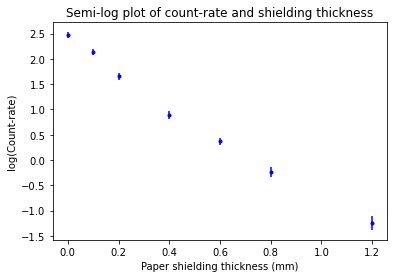

In [25]:
plt.errorbar(xVec, logRateVec, ulogRateVec, markersize = 3, fmt = "bo", label = "Log of exp. count-rate")
plt.title("Semi-log plot of count-rate and shielding thickness")
plt.xlabel("Paper shielding thickness (mm)")
plt.ylabel("log(Count-rate)")
plt.show()

We see that indeed the data appears to be roughly linear (though it does appear to become less linear at higher thicknesses), so it is worth fitting a linear model with intercept. We use the analytic best fit method to find the best fit slope and intercept, as well as their uncertainties.

In [27]:
A = np.sum(1/ulogRateVec)
B = np.sum(xVec*logRateVec/ulogRateVec)
C = np.sum(xVec/ulogRateVec)
D = np.sum(logRateVec/ulogRateVec)
E = np.sum(xVec**2/ulogRateVec)
Z = A * E - C**2

m = (A*B-C*D)/Z
um = np.sqrt(A/Z)
b = (D*E-B*C)/Z
ub = np.sqrt(E/Z)
print(m, um)
print(b, ub)

-3.209639085970639 0.29195964405565905
2.3674816618410097 0.14946313333491243


So we conclude that $m = -3.21 \pm 0.29$ and $b = 2.37 \pm 0.15$. Let us plot this model with residuals, and also calculate the weighted $\chi_w^2$:

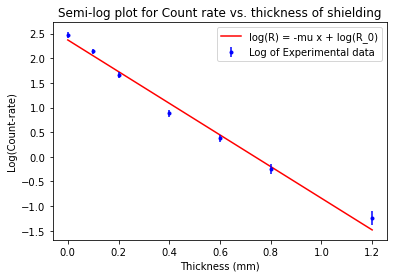

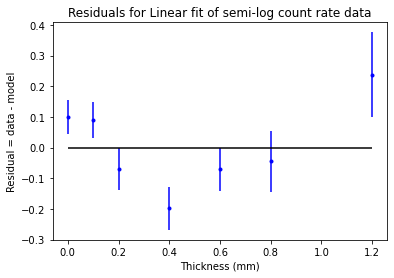

3.72012723226801


In [28]:
# DATA/MODEL PLOT
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
slope = -3.21  # best fit slope
intercept = 2.37  # best fit intercept
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
RVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, RVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (RVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print(chisquared)

## Analysis

**Discussion of Model Failure:** What we find is extremely intriguing; we find that the residuals plot appears to have a clear nonlinear trend, and $\chi_w^2$ is not close to 1 as we might expect it to be; instead it is $\chi_w^2 > 1$ (by a reasonable margin) The residuals and $\chi_w^2$ both support the conclusion that the linear model (and hence the pure exponential model $R(x) = R_0\exp(-\mu x$ for the count-rate) is not a good model. This gives a more quantitative backing for the earlier observation that the semi-log plot did not look totally linear. We will hypothesize why the model may have failed and how to improve/amend it.

In addition to the graphical observation that the linearity seems to "level off" as we increase the shielding thickness, we have observed in the experiments that at higher shieldings there is very little change in the number of counts we were seeing. We wondered about why this might be; after discussion with group members, we hypothesized that there might be a small amount of radiation independent of what the source produces. To test this hypothesis, we took the source out of the device, and saw if any counts would be registered. Although limited in number, even with the source removed the Geiger counter registered a number of counts, which supports the hypothesis of background radiation. An improved model would incorporate this background; e.g. through the addition of a constant background term $B$, giving:

$$R(x) = R_0\exp(-\mu x) + B.$$

**Possible Improvements:** Improvements could involve a measurement and fit of this background term. Another possibility is to try to fit the data in the low-shielding region where the background is negligeble and the original purely exponential model would be a reasonable approximation.

Another possible improvement for the next lab (which is independent of what model we choose) is to increase the amount of time we are counting for. This will decrease the uncertainty in the count rate, and improve the quality of individual datapoints.

**Obtaining physical parameters from fit parameters:** Although we concluded that the model we are fitting is not a good fit, we can still obtain estimates for the physical parameters of the attenuation coefficient $\mu$ and zero-shielding count-rate $R_0$ from the best-fit parameters (though the actual usefulness of these results must be put under a certain degree of doubt due to the poor fit of the model). For $\mu$, we obtain:

$$\mu = -m = 3.21, u[\mu] = u[m] = 0.29$$

So the attenuation parameter (keeping in mind the units of the thicknesses used) is $\mu = 3.21 \pm 0.29 \text{mm}^{-1}$. The zero-shielding thickness can be obtained by manipulating the intercept:

$$R_0 = \exp(b) = 10.7, u[R_0] = u[b]\exp(b) = 1.6$$

So the zero-shielding count-rate obtained from the fit is $R_0 = 10.7 \pm 1.6$ counts/second.

**Comparisons:** Other groups also found a similar failure of the linear model fit, which tells us that the effect is not just due to some failure in our measurement apparatus but a global effect; this further supports our background count hypothesis. Comparing with X and Ys group, they found that $\mu = 3.05 \pm 0.18$. We did a t'-score between their attenuation coefficient and ours, and found that $t = 0.47$. Since $t' \ll 1$, we conclude that there is not a significant difference between the attenuation coefficient measured by their group and by us. This makes sense as the attenuation coefficient should be independent of the source used, and should just depend on the material used in the attenuation, and we both used paper. Conversely, we could expect a difference in the value of $R_0$ (zero shielding count-rate) as this should depend on the radioactive source used. Their value for $R_0$ was $R_0 = 8.5 \pm 1.2$. Doing a t'-score between their $R_0$ and ours, we find $t' = 1.8$. There is tension between the two results; it could be possible that a future measurement could resolve a difference, or make us less confident that one could exist. The two experiments were done with different sources, but different sources made from the same material (and of the same make), so both a difference and no difference would be consistent with what we could expect.

Another comparison we can do internally is comparing the fit parameter $R_0$ with the experimental count-rate value measured at zero shielding, which was $R(0) = 11.8 \pm 0.67$. Calculating a t-score between these values, we have $t = 0.67$. Since $t \ll 1$, we are not confident at all there is a difference. This makes sense as the two should be quantifying the same thing.

In [37]:
# Calculations
mu = -m
umu = um
print(mu, umu)
R0 = np.exp(b)
uR0 = ub*np.exp(b)
print(R0, uR0)

print(RateVec[0], uRateVec[0])

tmu = np.abs(mu - 3.05)/np.sqrt(umu**2 + 0.18**2)
tR0 = np.abs(R0 - 8.5)/np.sqrt(ub**2 + 1.2**2)
tR0self = np.abs(R0 - RateVec[0])/np.sqrt(uR0**2 + uRateVec[0]**2)
print(tmu)
print(tR0)
print(tR0self)                                     

3.209639085970639 0.29195964405565905
10.670486526038665 1.5948443503897036
11.821922933034044 0.6655520679288949
0.4654370206929422
1.7948701251365173
0.6662842787219528


## Conclusion/Summary of Results

In conclusion, we found through a fit of a linear model to the (linearized) data that the attenuation parameter was $\mu = 3.21 \pm 0.29 \text{mm}^{-1}$ and the zero-shielding count-rate was $R_0 = 10.7 \pm 1.6$ counts/second. The attenuation parameter was found to be consistent with the findings of other groups, and the zero-shielding count rate was found to be consistent with a direct measurement (both evaluated quantitatively using a t-score).

We found that $\chi_w^2 = 3.72 >1$ and that the residuals of the best-fit model exhibited a clear nonlinear trend. Both of these support the conclusion that the pure exponential model of $R(x) = R_0\exp(-\mu x)$ is not a good fit to the data. We hypothesized that this was due to background radiation that was independent of the shielding used, and we confirmed this hypothesis by measuring counts with the source removed. Further investigations would quantify the background count rate, and introduce it as an additional fit parameter to the model. We hypothesize that this would lead to a model that better fits the data, and a more accurate estimation of the attenuation coefficient.